# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [3]:
from src.data.unified_dataloader import load_dataset
_, processed_adult = load_dataset('adult')

In [4]:
processed_adult.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 3. Split label/unlabel data, split train/test data.

In [ ]:
'''census income kdd dataset'''
# sampled_data = processed_census_income_kdd.sample(frac=0.02, random_state=25)  # 2% of the data
# df = sampled_data.copy()
# X = df.drop('class', axis=1)
# y = df['class']
# X.shape


'''UCI dataset'''
df = processed_adult.copy()
# df = processed_adult.sample(frac=0.2, random_state=25)  # 20% of the data
X = df.drop('income', axis=1)
y = df['income']
X.shape

(6512, 106)

In [9]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='adult')

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据
4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 37
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据
4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和

### 4. read saved_csv file and make plots

In [10]:
def extract_original_values(fold):
    original_DR = fold.loc[0,'new_DR']
    original_DP = fold.loc[0,'new_DP']
    original_EO = fold.loc[0,'new_EO']
    original_PQP = fold.loc[0,'new_PQP']
    return original_DR, original_DP, original_EO, original_PQP

In [11]:
''' german credit dataset '''

fold1 = pd.read_csv('saved_results/adult/1-fold_results.csv')
fold2 = pd.read_csv('saved_results/adult/2-fold_results.csv')
fold3 = pd.read_csv('saved_results/adult/3-fold_results.csv')
fold4 = pd.read_csv('saved_results/adult/4-fold_results.csv')
fold5 = pd.read_csv('saved_results/adult/5-fold_results.csv')

fold1_original_DR, fold1_original_DP, fold1_original_EO, fold1_original_PQP = extract_original_values(fold1)
fold2_original_DR, fold2_original_DP, fold2_original_EO, fold2_original_PQP = extract_original_values(fold2)
fold3_original_DR, fold3_original_DP, fold3_original_EO, fold3_original_PQP = extract_original_values(fold3)
fold4_original_DR, fold4_original_DP, fold4_original_EO, fold4_original_PQP = extract_original_values(fold4)
fold5_original_DR, fold5_original_DP, fold5_original_EO, fold5_original_PQP = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

fold1.head(3)

,action_number,new_DR,new_DP,new_EO,new_PQP
1,1,0.047510,0.199802,0.064928,0.057253
2,2,0.020694,0.188305,0.037681,0.032829
3,3,0.040226,0.194009,0.026812,0.089977


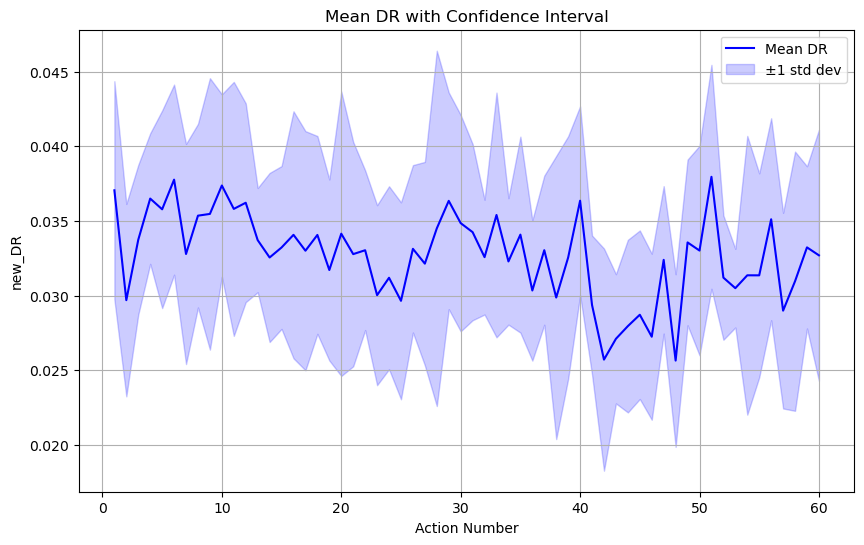

In [12]:
import matplotlib.pyplot as plt

for fold in [fold1, fold2, fold3, fold4, fold5]:
    fold['action_number'] = pd.to_numeric(fold['action_number'])

min_action = 1
max_action = min([
    len(fold1['action_number']),
    len(fold2['action_number']),
    len(fold3['action_number']),
    len(fold4['action_number']),
    len(fold5['action_number'])
])

# 创建一个包含所有可能action_number的列表
action_range = np.arange(min_action, max_action + 1)

# 创建一个字典来存储每个action_number对应的new_DR值
dr_values = {action: [] for action in action_range}

# 收集每个action_number对应的所有new_DR值
for fold in [fold1, fold2, fold3, fold4, fold5]:
    mask = (fold['action_number'] >= min_action) & (fold['action_number'] <= max_action)
    for action, dr in zip(fold.loc[mask, 'action_number'], fold.loc[mask, 'new_DR']):
        dr_values[action].append(dr)

# 计算每个action_number的均值和标准差
means = []
stds = []
for action in action_range:
    values = dr_values[action]
    means.append(np.mean(values))
    stds.append(np.std(values))

# 转换为numpy数组以便于计算
means = np.array(means)
stds = np.array(stds)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制均值线
plt.plot(action_range, means, 'b-', label='Mean DR')

# 绘制填充区域（均值±标准差）
plt.fill_between(action_range, 
                 means - stds,
                 means + stds,
                 alpha=0.2,
                 color='b',
                 label='±1 std dev')

plt.xlabel('Action Number')
plt.ylabel('new_DR')
plt.title('Mean DR with Confidence Interval')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

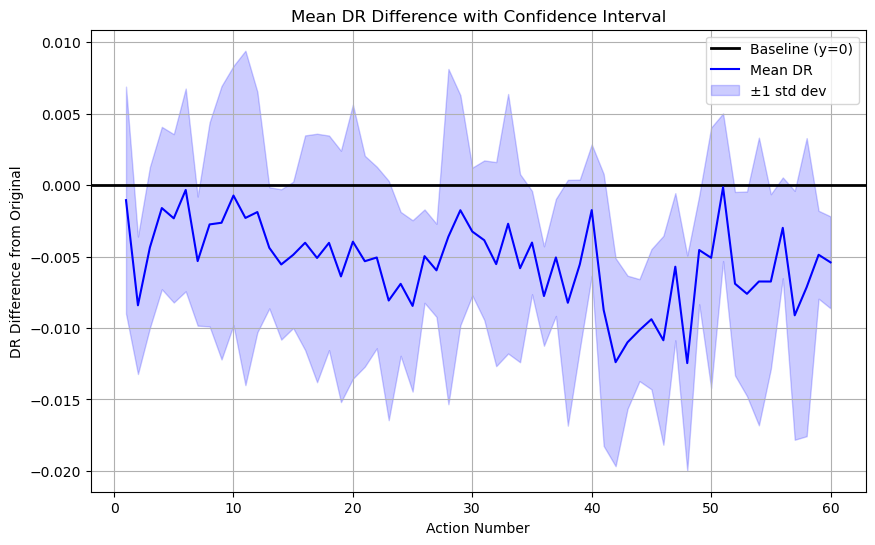

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 首先确保所有DataFrame中的action_number列都是数值类型
for fold in [fold1, fold2, fold3, fold4, fold5]:
    fold['action_number'] = pd.to_numeric(fold['action_number'])

# 减去各自的original_DR
fold1['new_DR'] = fold1['new_DR'] - fold1_original_DR
fold2['new_DR'] = fold2['new_DR'] - fold2_original_DR
fold3['new_DR'] = fold3['new_DR'] - fold3_original_DR
fold4['new_DR'] = fold4['new_DR'] - fold4_original_DR
fold5['new_DR'] = fold5['new_DR'] - fold5_original_DR

# 找到最小的action_number范围
min_action = max([
    fold1['action_number'].min(),
    fold2['action_number'].min(),
    fold3['action_number'].min(),
    fold4['action_number'].min(),
    fold5['action_number'].min()
])

max_action = min([
    fold1['action_number'].max(),
    fold2['action_number'].max(),
    fold3['action_number'].max(),
    fold4['action_number'].max(),
    fold5['action_number'].max()
])

# 创建一个包含所有可能action_number的列表
action_range = np.arange(min_action, max_action + 1)

# 创建一个字典来存储每个action_number对应的new_DR值
dr_values = {action: [] for action in action_range}

# 收集每个action_number对应的所有new_DR值
for fold in [fold1, fold2, fold3, fold4, fold5]:
    mask = (fold['action_number'] >= min_action) & (fold['action_number'] <= max_action)
    for action, dr in zip(fold.loc[mask, 'action_number'], fold.loc[mask, 'new_DR']):
        dr_values[action].append(dr)

# 计算每个action_number的均值和标准差
means = []
stds = []
for action in action_range:
    values = dr_values[action]
    means.append(np.mean(values))
    stds.append(np.std(values))

# 转换为numpy数组以便于计算
means = np.array(means)
stds = np.array(stds)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制加粗的y=0基准线
plt.axhline(y=0, color='black', linewidth=2, linestyle='-', label='Baseline (y=0)')

# 绘制均值线
plt.plot(action_range, means, 'b-', label='Mean DR')

# 绘制填充区域（均值±标准差）
plt.fill_between(action_range, 
                 means - stds,
                 means + stds,
                 alpha=0.2,
                 color='b',
                 label='±1 std dev')

plt.xlabel('Action Number')
plt.ylabel('DR Difference from Original')
plt.title('Mean DR Difference with Confidence Interval')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()